# Benchmark for PyMieDAP

This notebook contains some tests that can tell you whether or not everything is working fine in your PyMieDAP install.

In [1]:
%matplotlib inline
import pymiedap.pymiedap as pmd
import matplotlib.pyplot as mpl  # for plotting
import numpy as np 

## Test of the Mie code
We will first check that the Mie code runs fine. For that, we use the tabulated output from **De Rooij et al. 1984**.
We define the same types of aerosols they use.

In [2]:
aerA = pmd.Aerosols(nr=[1.45], ni=[0], r_eff=0.23, v_eff=0.18)
aerB = pmd.Aerosols(nr=[1.44], ni=[0], r_eff=1.05, v_eff=0.07)
aerC = pmd.Aerosols(nr=[1.33], ni=[0], v_eff=0.07, r_eff=2, par3=0.5, psd='7')
aerD = pmd.Aerosols(nr=[1.33], ni=[0], r_eff=2.2, v_eff=0.07)

then we compute the Mie scattering

In [3]:
coefsA = pmd.mie_code(aerA, [0.55], nsubr=40, ngaur=500) # wvl= 0.55 um
coefsB = pmd.mie_code(aerB, [0.55], nsubr=40, ngaur=500) 
coefsC = pmd.mie_code(aerC, [0.70], nsubr=40, ngaur=500) #wvl = 0.7 um
coefsD = pmd.mie_code(aerD, [0.70], nsubr=40, ngaur=500)

Beginning of Mie program
Wavelength 0.5500000
End of Mie program
Beginning of Mie program
Wavelength 0.5500000
End of Mie program
Beginning of Mie program
Wavelength 0.7000000
End of Mie program
Beginning of Mie program
Wavelength 0.7000000
End of Mie program


First thing we can check is that the asymmetry parameter is correct.

In [4]:
print(aerA.asym) # asymmetry parameter.
print(aerB.asym) # asymmetry parameter.
print(aerC.asym) # asymmetry parameter.
print(aerD.asym) # asymmetry parameter.

[ 0.72100229]
[ 0.7179972]
[ 0.804201]
[ 0.80188248]


Then we can check the coefficients on some lines

In [5]:
coordsx = [0,1,2,3,0,2] #positions of alphas and betas in the coef table
coordsy = [0,1,2,3,1,3]
print(aerA.coefs[0,coordsx,coordsy,0]) #checking the values of coefficients againt de Rooij et al 1984,for l=0
print(aerA.coefs[0,coordsx,coordsy,10])  #l=10
print(aerA.coefs[0,coordsx,coordsy,15])  # l=15
print(aerA.coefs[0,coordsx,coordsy,24])  #l=24

[ 1.          0.          0.          0.92901809  0.          0.        ]
[ 0.08802913  0.11121631  0.10151652  0.0832367  -0.00358954  0.02614555]
[ 0.00228455  0.00218155  0.00224082  0.00255047  0.00033707  0.00046371]
[  5.48015333e-06   6.77440344e-06   2.37713944e-06   1.97521301e-06
  -7.37991466e-07   3.53992457e-06]


And for aerosols B, C and D.

In [6]:
print(aerB.coefs[0,coordsx,coordsy,0])
print(aerB.coefs[0,coordsx,coordsy,10])
print(aerB.coefs[0,coordsx,coordsy,15])
print(aerB.coefs[0,coordsx,coordsy,24])

[ 1.          0.          0.          0.86462372  0.          0.        ]
[ 5.06996479  5.33408747  5.31811435  5.12294652  0.03998552  0.02898462]
[ 4.29325014  4.22823484  4.16063179  4.35190093 -0.04425792  0.31830627]
[ 1.48138437  1.66704814  1.50932983  1.42450347 -0.04210442  0.24849267]


In [7]:
print(aerC.coefs[0,coordsx,coordsy,0])
print(aerC.coefs[0,coordsx,coordsy,10])
print(aerC.coefs[0,coordsx,coordsy,15])
print(aerC.coefs[0,coordsx,coordsy,80])

[ 1.          0.          0.          0.95461472  0.          0.        ]
[ 1.17713563  1.2847585   1.2659546   1.17411335 -0.02230815  0.09498393]
[ 0.42561199  0.42569832  0.4231388   0.4298012  -0.0055369   0.04263078]
[  1.28782521e-06   1.40241107e-06   1.04194570e-06   9.98265353e-07
   8.49592384e-08   4.62722533e-07]


In [8]:
print(aerD.coefs[0,coordsx,coordsy,0])
print(aerD.coefs[0,coordsx,coordsy,10])
print(aerD.coefs[0,coordsx,coordsy,15])
print(aerD.coefs[0,coordsx,coordsy,80])

[ 1.          0.          0.          0.91852089  0.          0.        ]
[ 7.20704159  7.35295547  7.25693617  7.13468861 -0.029961    0.09669141]
[ 7.98539793  8.00874554  7.98884822  7.99970188  0.02916147  0.16475289]
[  3.04667428e-03   3.18324854e-03   2.83399090e-03   2.77620381e-03
   2.74463843e-05   5.59438200e-04]


## Test of the DAP code

in their paper, de Haan et al, have tested two atmosphere models:
* one with an homogeneous atmosphere above a black surface, only with aerosols and opacity=1 (we'll call it modelA)
* one with a Lambertian surface (A=0.1) and two layers: (modelB)
    * an upper layer of molecules with opacity 0.1
    * a lower layer with gas and aerosols mixed such as the molecular opt. thickness is 0.1 and aerosol opt. thickness is 0.4
    
Molecular depolarization is 0.0279. The aerosols are those of the type C defined above.

In [9]:
modelB = pmd.Model()
modelB.wvl_list = [0.7]
del modelB.layers.gasbelow
del modelB.layers.haze
modelB.layers.gastop.rayscat=False
modelB.layers.gastop.tau_ray=[0.1]
modelB.layers.cloud.rayscat=False
modelB.layers.cloud.tau = [0.4]
modelB.layers.cloud.tau_ray = [0.1]
modelB.layers.cloud.aerosols = aerC
modelB.dpol=0.0279
modelB.surface[0,0] = 0.1


modelA = pmd.Model()
modelA.wvl_list = [0.7]
del modelA.layers.gastop
del modelA.layers.haze
del modelA.layers.cloud
modelA.layers.gasbelow.rayscat=False
modelA.layers.gasbelow.tau=[1.0]
modelA.layers.gasbelow.aerosols = aerC
modelA.surface[0,0] = 0.0



In [10]:
modelB
modelA.layers.gasbelow.aerosols

Spherical particles
nr =[1.33]))
ni =[0]))
   R_eff = 2.000 
 Type: C

In [11]:
mus = np.array([0.1, 0.5, 1.0, 0.1, 0.5, 1.0, 0.1, 0.5, 1.0, 0.1, 0.5, 1.0])
emissions = np.degrees(np.arccos(mus))
mu0s = np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
szas = np.degrees(np.arccos(mu0s))
dphi = np.radians([0, 0, 0, 30, 30, 30, 0, 0, 0, 30, 30, 30])
alphas = mus*mu0s  + np.sqrt(1-mus**2)*np.sqrt(1-mu0s**2)*np.cos(dphi) 
phases = np.degrees(np.arccos(alphas))
print(phases)
print(emissions)
print(szas)
pmd.calc_azimuth(phases,szas,emissions, deg=True)

[  2.42608295e+01   8.53773646e-07   6.00000000e+01   3.72274111e+01
   2.59050793e+01   6.00000000e+01   0.00000000e+00   2.42608295e+01
   8.42608295e+01   2.98461183e+01   3.72274111e+01   8.42608295e+01]
[ 84.26082952  60.           0.          84.26082952  60.           0.
  84.26082952  60.           0.          84.26082952  60.           0.        ]
[ 60.          60.          60.          60.          60.          60.
  84.26082952  84.26082952  84.26082952  84.26082952  84.26082952
  84.26082952]


pymiedap/pymiedap.py:725: RuntimeWarning: invalid value encountered in divide
  c_delta_phi = t1/t2


array([  8.53773646e-07,   8.53773646e-07,   0.00000000e+00,
         3.00000000e+01,   3.00000000e+01,   0.00000000e+00,
         0.00000000e+00,   8.53773646e-07,   0.00000000e+00,
         3.00000000e+01,   3.00000000e+01,   0.00000000e+00])

In [12]:
pmd.compute_model(modelA, output_name='modelA', rename=True, nmat=4, nmug=40)
pmd.compute_model(modelB, output_name='modelB', rename=True, nmat=4, nmug=40)
print(modelA.name)

In layer gasbelow:
Beginning of Mie program
Wavelength 0.7000000
End of Mie program
Aerosols mixed!
Beginning of DAP program
Wavelength 0.7000000 microns
C.sc.0.7000000
fou_0.7000000.dat
End of DAP program
In layer gastop:
Beginning of Mie program
Wavelength 0.7000000
End of Mie program
Aerosols mixed!
In layer cloud:
Beginning of Mie program
Wavelength 0.7000000
End of Mie program
Aerosols mixed!
Beginning of DAP program
Wavelength 0.7000000 microns
C.sc.0.7000000
C.sc.0.7000000
fou_0.7000000.dat
End of DAP program
['dap_database/modelA_0.7000000.dat']


In [13]:
print(modelA.bmsca)
print(modelA.basca)
print(modelB.bmsca)
print(modelB.basca)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.1  0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0. ]
[ 0.4  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0. ]


In [14]:
Ia, Qa, Ua, Va = pmd.read_dap_output(phases, szas, emissions, modelA.name[0], beta=np.zeros_like(dphi), phi=np.degrees(dphi))
Ib, Qb, Ub, Vb = pmd.read_dap_output(phases, szas, emissions, modelB.name[0], beta=np.zeros_like(dphi), phi=np.degrees(dphi))

In [15]:
Ia_haan = [1.10269, 0.31943, 0.033033, 0.66414, 0.25209, 0.033033, 2.93214, 0.22054, 0.009287, 0.76910, 0.132828, 0.009287]
Qa_haan = [0.004604, -0.002881, -0.002979, 0.000303, -0.001444, -0.001489, 0.009900, 0.000976, -0.000815, -0.003758, 0.000220, -0.000408]
Ua_haan = [0, 0, 0, -0.002770, -0.004141, -0.002580, 0, 0, 0, 0.003124, -0.000525, -0.000706]
Va_haan = [0, 0, 0, 0.000038, 0.000017, 0., 0, 0, 0, 0.000012, 0.000007, 0.]

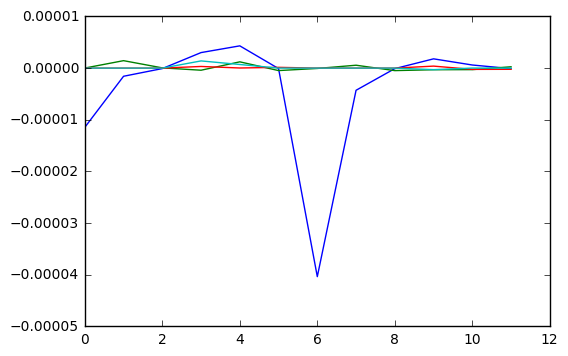

In [16]:
mpl.plot(Ia*mu0s*np.pi - Ia_haan)
mpl.plot(Qa*mu0s*np.pi - Qa_haan)
mpl.plot(Ua*mu0s*np.pi - Ua_haan)
mpl.plot(Va*mu0s*np.pi - Va_haan)

In [17]:
Ib_haan = [0.53295, 0.20843, 0.093680, 0.41814, 0.18497, 0.093680, 0.52277, 0.106590, 0.026009, 0.27630, 0.083628, 0.026009]
Qb_haan = [-0.028340, -0.036299, -0.024156, -0.000058, -0.019649, -0.012078, 0.011506, -0.005186, -0.014984, 0.034368, 0.003839, -0.007492]
Ub_haan = [0, 0, 0, -0.073105, -0.041401, -0.020920, 0, 0, 0, -0.016042, -0.014492, -0.012976]
Vb_haan = [0, 0, 0, 0.000106, 0.000040, 0, 0, 0, 0, 0.000027, 0.000017, 0]

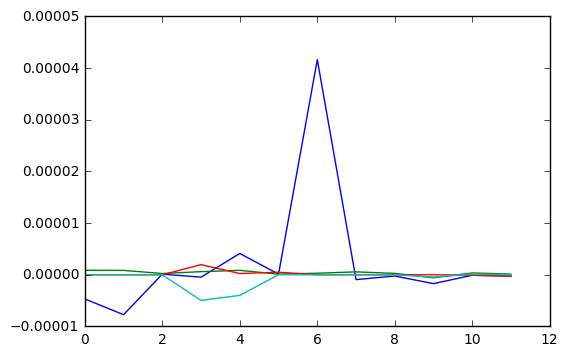

In [18]:
mpl.plot(Ib*mu0s*np.pi - Ib_haan)
mpl.plot(Qb*mu0s*np.pi - Qb_haan)
mpl.plot(Ub*mu0s*np.pi - Ub_haan)
mpl.plot(Vb*mu0s*np.pi - Vb_haan)

## Testing disk integration

Let's define a model that corresponds to a Lambertian surface with surface albedo 1.0.

In [19]:
modelA = pmd.Model()
modelA.wvl_list = [0.7]
del modelA.layers.gastop
del modelA.layers.haze
del modelA.layers.cloud
modelA.layers.gasbelow.rayscat=False
modelA.layers.gasbelow.tau=[0.0]
modelA.surface[0,0] = 1.0

In [20]:
alphas = np.linspace(0,np.pi,80) # phase angles
alphas_deg = np.degrees(alphas)  # in degrees
theta = np.pi - alphas  # scattering angle
P = 2*(np.sin(theta) - theta*np.cos(theta))/(3.*np.pi)  # analytical Lambertian phase function

In [21]:
pmd.planet_integrated([modelA],npix=60, alpha=alphas_deg)

In layer gasbelow:
Beginning of Mie program
Wavelength 0.7000000
End of Mie program
Aerosols mixed!
Beginning of DAP program
Wavelength 0.7000000 microns
C.sc.0.7000000
fou_0.7000000.dat
End of DAP program
Reading dap_database/modelA_0.7000000.dat


pymiedap/pymiedap.py:2391: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xs[nmug] = 1.0
pymiedap/pymiedap.py:2392: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  w[nmug] = 1.0
pymiedap/pymiedap.py:2393: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  smf[nmug] = 1.0
pymiedap/pymiedap.py:2398: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  L = np.zeros((nmat,nmat,nmu,nmu), order='F')
pymiedap/pymiedap.py:2423: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Lfin[nmat*i+l,nmat*j+k] = smf[i]*L[l,k,i,j]*smf[j]


1.250000% done


pymiedap/pymiedap.py:2361: RuntimeWarning: invalid value encountered in greater_equal
  cl = np.where(grid_lit>=0)[0].size
pymiedap/pymiedap.py:2367: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  diffgrid = grid_lit[:npix/2.,:] - grid_lit[(npix/2.)-1::-1,:]


Reading dap_database/modelA_0.7000000.dat
2.500000% done
Reading dap_database/modelA_0.7000000.dat
3.750000% done
Reading dap_database/modelA_0.7000000.dat
5.000000% done
Reading dap_database/modelA_0.7000000.dat
6.250000% done
Reading dap_database/modelA_0.7000000.dat
7.500000% done
Reading dap_database/modelA_0.7000000.dat
8.750000% done
Reading dap_database/modelA_0.7000000.dat
10.000000% done
Reading dap_database/modelA_0.7000000.dat
11.250000% done
Reading dap_database/modelA_0.7000000.dat
12.500000% done
Reading dap_database/modelA_0.7000000.dat
13.750000% done
Reading dap_database/modelA_0.7000000.dat
15.000000% done
Reading dap_database/modelA_0.7000000.dat
16.250000% done
Reading dap_database/modelA_0.7000000.dat
17.500000% done
Reading dap_database/modelA_0.7000000.dat
18.750000% done
Reading dap_database/modelA_0.7000000.dat
20.000000% done
Reading dap_database/modelA_0.7000000.dat
21.250000% done
Reading dap_database/modelA_0.7000000.dat
22.500000% done
Reading dap_database

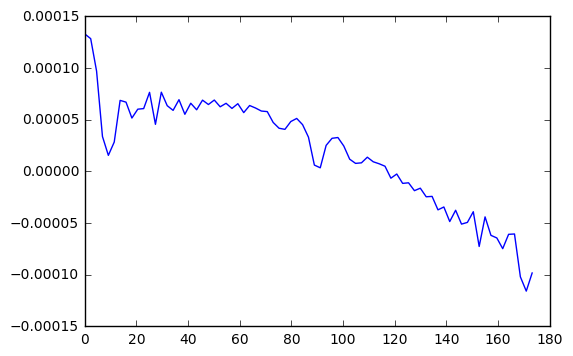

In [22]:
mpl.plot(modelA.phase, modelA.I[0,:]-P)  #comparing the two models